## The Simple Ideal Rankine Cycle
Consider a steam power plant operating on the simple ideal Rankine cycle. Here are the states:

- (1) after the condenser, entering the pump;
- (2) after the pump, entering the boiler;
- (3) after the boiler, entering the turbine;
- (4) after the turbine, entering the condenser.


Steam enters the turbine at $p_3$ and $T_3$ and is condensed in the condeser at a pressure of $p_4$. Determine the thermal efficiency of this cycle.

In [1]:
T3_C = 350
p3_MPa = 3
p4_kPa = 75

# conversion 
T3_K = T3_C + 273.15
p4_MPa = p4_kPa/1000

### Solution
A steam power plant operating on the simple ideal Rankine cycle is considered. The thermal efficiency of the cycle is to be determined. 

### Assumptions
- steady operating conditions exist
- kinetic and potential energy changes are negligible 
- as the power plant operates on the ideal Rankine cycle, we assume that the pump and turbine are isentropic; there are no pressure drops in the boiler and condenser; and steam leaves the condenser and enters the pump as a saturated liquid at the condenser pressure. 

In [2]:
p1_MPa = p4_MPa
p2_MPa = p3_MPa

### Analysis
To solve this, we need to know the properties at states 1, 2, 3, and 4. For this, we can use the IAPWS module as our working fluid is water. 

In [3]:
!pip install iapws

  Using cached iapws-1.5.4-py3-none-any.whl


IAPWS stands for "The International Association for the Properties of Water and Steam". According to them, they are "...an international non-profit association of national organizations concerned with the properties of water and steam, particularly thermophysical properties, cycle chemistry guidelines, and other aspects of high-temperature steam, water and aqueous mixtures relevant to thermal power cycles and other industrial and scientific applications."

This looks like:

In [4]:
from iapws import IAPWS97

In order to calculate a thermodynamic property, we need to define several properties, such as temperature $T$ and pressure $p$, and for vapor-liquid mixtures, the quality $x$. $T$ should be in the units Kelvin, $p$ should be in MPa, and $x$ should be between 0 and 1.

State 1 is a saturated liquid. Therefore, $x = 0$:

In [5]:
quality = 0

We then have enough information to calculate all of the thermodynamic properties at this state. The first step in determining properties like $p$, specific entropy $s$, specific enthalpy $h$, etc., is to use the IAPWS97 module. This is written in this case as:

In [6]:
# pressure should be in the units MPa, 
# temperature in the units K, 
# quality a number betwee 0 and 1. 
P1 = p1_MPa
sat_liquid1 = IAPWS97(P=P1, x=quality)

From this, we can now calculate $T_1$ (K), $s_1$ (kJ/(kg K)), $h_1$ (kJ/kg), specific volume $v_1$ (m$^3$/kg).

In [32]:
T1 = sat_liquid1.T # K
s1 = sat_liquid1.s # kJ/kg*K
h1 = sat_liquid1.h # kJ/kg
v1 = sat_liquid1.v # m3/kg
x1 = sat_liquid1.x

If we want to analyze a steam cycle, we can define three other states. Here we will look at a Rankine cycle, an idealized cycle for a thermoelectric powerplant. So we can say that state 2 is after the compressor, so the pressure is higher ($P_2 = 3$ MPa), and we will assume that the compressor is isentropic ($s_1 = s_2$):

In [8]:
P2 = p2_MPa        # MPa
s2 = s1            # kJ/kg*K

Again, we can calculate the properties at this state as:

In [9]:
sat_liquid2 = IAPWS97(P=P2, s=s1)
T2 = sat_liquid2.T # K
h2 = sat_liquid2.h # kJ/kg

With the values of $p_1$, $p_2$, and $v_1$ known, we can calculate the specific work, $w_{12}$ (kJ/kg) done by this compressor as:

In [10]:
w12 = v1*(P2 - P1)*1e6/1e3 # kJ/kg; 
# Pressure is in MPa units, 
# and we want this to be in kJ/kg, 
# hence the 1e6/1e3 ratio.

Note: 1e6 = 1000000 and 1e3 = 1000

We can print this value as:

In [11]:
print('The compressor work is: {0:1.4f} kJ/kg'.format(w12))

The compressor work is: 3.0339 kJ/kg


We can now define state 3 of our Rankine cycle, which is after the boiler. 

We know $T_3$ and $p_3 = p_2$:

In [12]:
T3 = T3_K # K
P3 = P2 # definition of isobaric, MPa

Again, we can calculate the properties at this state as:

In [13]:
steam = IAPWS97(P=P3, T=T3)
h3 = steam.h # kJ/kg
s3 = steam.s # kJ/kg*K

We can calculate the heat transferred to the water $Q_\text{b}$ (kJ/kg), generating steam by taking the difference in specific enthalpy between states 3 and 2:

In [14]:
Qb = h3 - h2 # heat required to make the steam, kJ/kg

print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(Qb))

The boiler heat duty is: 2728.66 kJ/kg


Next, the high pressure steam passes through the turbine, which is used to generate electricity in a powerplant. Here we assume that the turbine operates isentropically, $s_4 = s_3$, and that the pressure is the same as that at state 1, $p_4 = p_1$. 

With these assumptions, we can calculate the thermodynamic properties of state 4 as:

In [15]:
s4 = s3 # isentropic #kJ/kg*K

In [16]:
P4 = P1 # MPa

In [31]:
steam = IAPWS97(P=P4, s=s4)
T4 = steam.T # K
h4 = steam.h # kJ/kg
x4 = steam.x

We can then calculate the specific work generated by the turbine, $w_{34}$:

In [18]:
w34 = h4 - h3 # work extracted from the expansion, kJ/kg
print('The turbine work is: {0:1.2f} kJ/kg'.format(w34))

The turbine work is: -713.03 kJ/kg


Next, the steam enters the condenser where it is cooled, condensing back into a liquid, where is it is then pumped by the compressor back into the boiler. The amount of heat removed by the condenser can be calculated as ($Q_{\text{c}}$):

In [19]:
Qc = h4 - h1 # Cooling from T4 to T1, kJ/kg
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(Qc))

The condenser heat duty is 2018.66 kJ/kg


The efficiency of the Rankine cycle can be calculated then as:

In [20]:
eta = -(w34 - w12) / Qb

print('The overall efficiency is {0:1.2%}.'.format(eta))

The overall efficiency is 26.24%.


The negative sign we have in front of the $w_{34}$ is due to the convention we used here. In our convention, the work we calculated was the energy consumed by the device. Normally, the convention in thermodynamics is that the work done by a system is positive, and the heat transferred into a system is positive. The opposites of this are then negative. For whatever convention you decide to use, the main point is to be consistent, although we recommend following the norm. 

We can now show this Rankine cycle on the T-s diagram, as is customary. We can also save this plot as an image. For this we need to import some additional modules. 

In [47]:
import numpy as np
import matplotlib.pyplot as plt

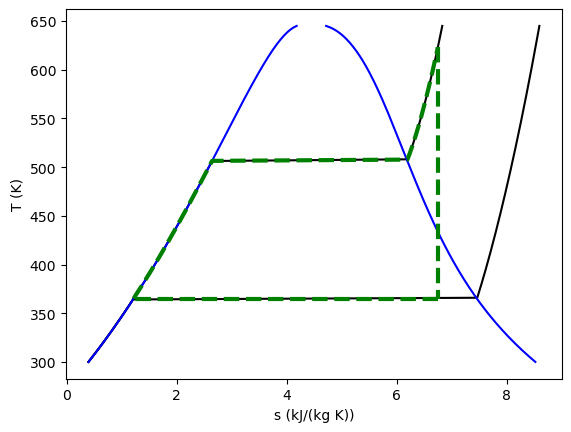

In [46]:
linewidth = 3

plt.figure()
plt.clf()
T = np.linspace(300, 372+273, 200) # range of temperatures
for P in [p3_MPa, p4_MPa]: #MPa
    steam = [IAPWS97(T=t, P=P) for t in T]
    S = [s.s for s in steam]
    plt.plot(S, T, 'k-')

# saturated vapor and liquid entropy lines
svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T]]
sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'b-')
plt.plot(sliq, T, 'b-')

# plt.yscale('log')

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')

T23 = np.linspace(T2, T3,200)
S23 = [s.s for s in [IAPWS97(P=P2, T=t) for t in T23]]

# process 4 to 1. isobaric. 
T41 = np.linspace(T4, T1, 200) 
x41 = np.linspace(x4, x1, 200) 
S41 = [s.s for s in [IAPWS97(P=P1, x=t) for t in x41]]

plt.plot([s1, s2], [T1, T2], 'g--', lw=linewidth) # Path 1 to 2
plt.plot(S23, T23, 'g--', lw=linewidth) # path from 2 to 3 is isobaric
plt.plot([s3, s4], [T3, T4], 'g--', lw=linewidth) # path from 3 to 4 is isentropic
plt.plot(S41, T41, 'g--', lw=linewidth) # and from 4 to 1 is isobaric

plt.savefig('rankineCycle-T-s-diagram.png')

It is instructive to compare the efficiency we calculated here with the Carnot efficiency. Recall that:

$\eta_\text{Carnot} = 1 - \frac{T_\text{C}}{T_\text{H}}$.

In [23]:
TC_K = T4
TH_K = T3

In [24]:
eta_carnot = 1 - TC_K / TH_K

print('The Carnot efficiency of this power plant is {0:1.2%}.'.format(eta_carnot))

The Carnot efficiency of this power plant is 41.44%.
